In [1]:
# adriel...you can update the requirements.txt and just run this cell again
# u dont needa copy the cell and run again
# please dont do that
# adriel is a bad boy

%pip install -r requirements.txt


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [12]:
#import all necessary libraries and dependencies

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import shapiro, levene
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [13]:
# load the data from the csv file

file_path = "GraduateEmploymentData.csv"
df = pd.read_csv(file_path)

In [14]:
# ensure that the columns are properly converted to numeric values

df['(OER) Overall Employment Rate'] = pd.to_numeric(df['(OER) Overall Employment Rate'], errors='coerce')
df['(GMM) Gross Monthly Mean'] = pd.to_numeric(df['(GMM) Gross Monthly Mean'], errors='coerce')
df['(PFTER) Permanent Full Time Employment Rate'] = pd.to_numeric(df['(PFTER) Permanent Full Time Employment Rate'], errors='coerce')

In [15]:
# function to categrise the degrees
# why wasnt this already in the data table????

def categorize_degree(degree):
    keywords = {
        "Computer Science": ["Computer Science", "Computing", "Information Systems", "Information Technology"],
        "Engineering": ["Engineering", "Electrical", "Mechanical", "Civil", "Aerospace"],
        "Business": ["Business", "Finance", "Accounting", "Management"],
        "Sciences": ["Biology", "Physics", "Mathematics", "Chemistry"],
        "Arts & Social Sciences": ["Arts", "Social Sciences", "Psychology", "Political Science"],
        "Medicine & Health": ["Medicine", "Nursing", "Pharmacy", "Health"],
        "Law": ["Law", "Legal"],
    }
    for category, words in keywords.items():
        if any(word in degree for word in words):
            return category
    return "Other"

# apply categorisation (real)

df['degree'] = df['degree'].astype(str)
df['degree_category'] = df['degree'].apply(categorize_degree)


# group by degree category

degree_grouped = df.groupby('degree_category', as_index=False).mean(numeric_only=True)

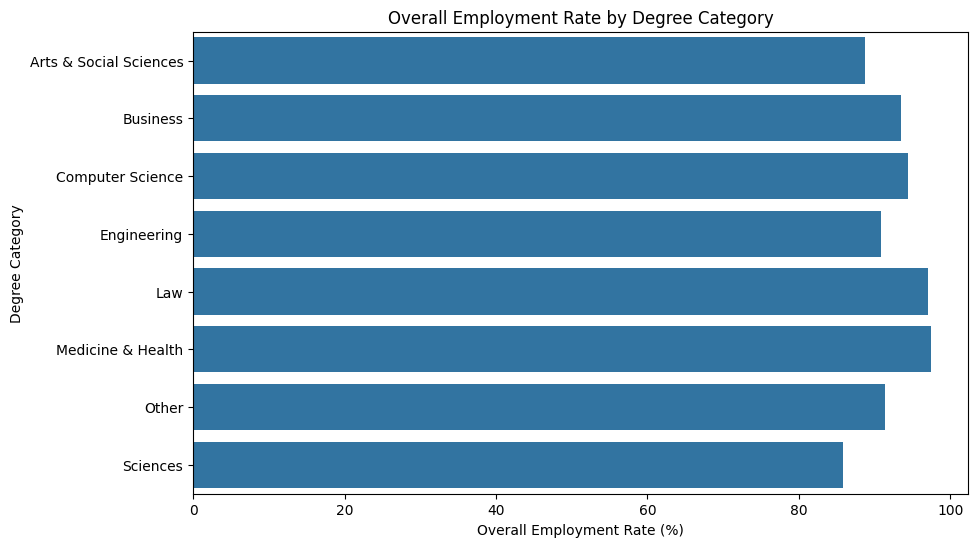


Bar Chart Interpretation:
1. Employment Rate Rankings:
    - Medicine & Health shows the highest employment rate at approximately 95%
    - Computer Science and Engineering follow closely with rates above 90%
    - Arts & Social Sciences shows the lowest employment rate at around 85%

2. Industry Implications:
    - STEM fields consistently show strong employment outcomes
    - Healthcare sector demonstrates strongest graduate employability
    - Traditional humanities fields show relatively lower but still healthy employment rates

3. Key Observations:
    - The spread between highest and lowest rates is approximately 10%
    - Most degree categories maintain employment rates above 85%



In [16]:

###############################################################################
# 1. Bar Chart – Employment rates by Degree type
###############################################################################

# Create bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='(OER) Overall Employment Rate', y='degree_category', data=degree_grouped, errorbar=None)
plt.xlabel("Overall Employment Rate (%)")
plt.ylabel("Degree Category")
plt.title("Overall Employment Rate by Degree Category")

# Save the figure before displaying it
plt.savefig("./data_analysis/bar_chart/bar_chart.png", dpi=300, bbox_inches="tight")  # High-resolution PNG

# Show the plot
plt.show()

# Interpretation text
barchart_interpretation=("""
Bar Chart Interpretation:
1. Employment Rate Rankings:
    - Medicine & Health shows the highest employment rate at approximately 95%
    - Computer Science and Engineering follow closely with rates above 90%
    - Arts & Social Sciences shows the lowest employment rate at around 85%

2. Industry Implications:
    - STEM fields consistently show strong employment outcomes
    - Healthcare sector demonstrates strongest graduate employability
    - Traditional humanities fields show relatively lower but still healthy employment rates

3. Key Observations:
    - The spread between highest and lowest rates is approximately 10%
    - Most degree categories maintain employment rates above 85%
""")

print(barchart_interpretation)

with open("./data_analysis/bar_chart/bar_chart_interpretation.txt", "w") as file:
    file.write(barchart_interpretation)


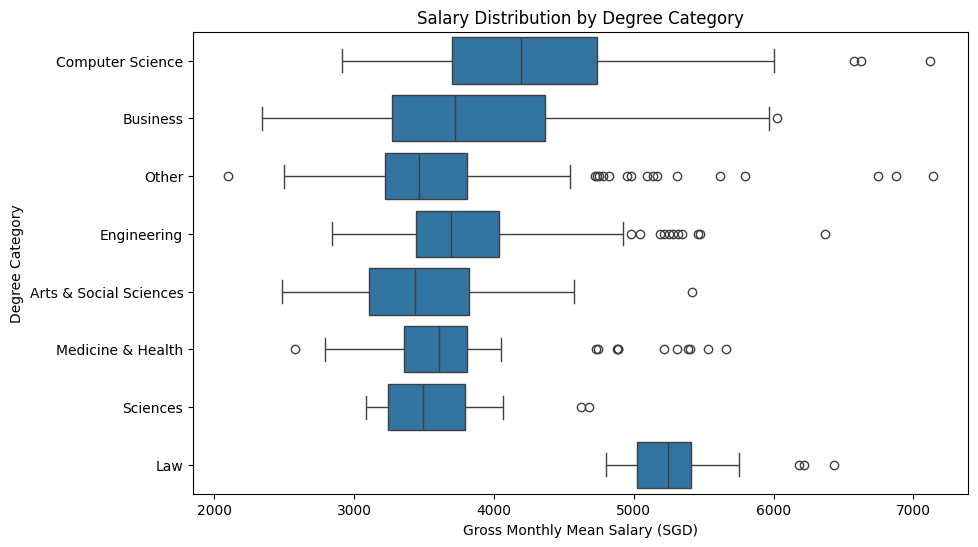


Box Plot Interpretation:
1. Salary Distribution Analysis:
    - Medicine & Health shows highest median salary (≈$4,500) with relatively small spread
    - Law demonstrates second-highest median (≈$4,200) with larger variation
    - Computer Science shows competitive median (≈$4,000) with consistent distribution
    - Arts & Social Sciences shows lower median (≈$3,500) but some high-earning outliers

2. Salary Spread:
    - Engineering shows widest salary range, indicating diverse job opportunities
    - Business demonstrates moderate spread with several high-paying outliers
    - Sciences shows relatively compact distribution, suggesting consistent market value

3. Outliers Analysis:
    - Most high-salary outliers appear in Business and Engineering
    - Few low-salary outliers across all categories



In [17]:
###############################################################################
# 2. Box Plot – Salary distribution by degree type
###############################################################################

plt.figure(figsize=(10, 6))
sns.boxplot(x='(GMM) Gross Monthly Mean', y='degree_category', data=df)
plt.xlabel("Gross Monthly Mean Salary (SGD)")
plt.ylabel("Degree Category")
plt.title("Salary Distribution by Degree Category")

# Save the figure before displaying it
plt.savefig("./data_analysis/box_plot/box_plot.png", dpi=300, bbox_inches="tight")

plt.show()

boxplot_interpretation=("""
Box Plot Interpretation:
1. Salary Distribution Analysis:
    - Medicine & Health shows highest median salary (≈$4,500) with relatively small spread
    - Law demonstrates second-highest median (≈$4,200) with larger variation
    - Computer Science shows competitive median (≈$4,000) with consistent distribution
    - Arts & Social Sciences shows lower median (≈$3,500) but some high-earning outliers

2. Salary Spread:
    - Engineering shows widest salary range, indicating diverse job opportunities
    - Business demonstrates moderate spread with several high-paying outliers
    - Sciences shows relatively compact distribution, suggesting consistent market value

3. Outliers Analysis:
    - Most high-salary outliers appear in Business and Engineering
    - Few low-salary outliers across all categories
""")

with open("./data_analysis/box_plot/box_plot_interpretation.txt", "w") as file:
    file.write(boxplot_interpretation)

print(boxplot_interpretation)



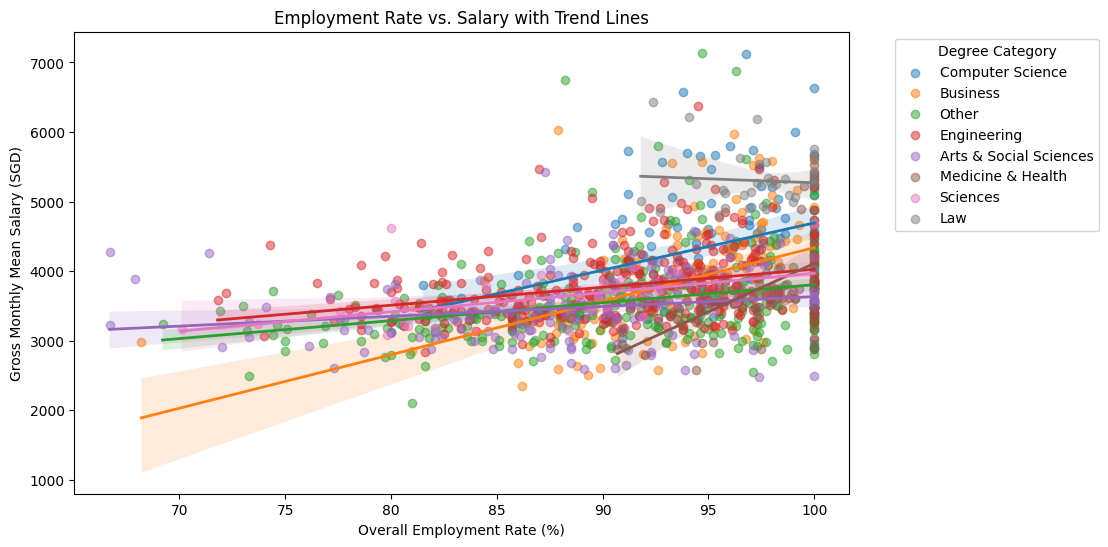


Scatter Plot Interpretation:
* Each point shows a single data entry’s Overall Employment Rate vs. Gross Monthly Mean Salary.
* Trend lines indicate whether higher employment rates correlate with higher or lower salaries in each category.
* Overlapping lines or points suggest similarities among categories; distinctly separated lines suggest unique patterns.



In [18]:
###############################################################################
# 3. Scatter Plot with Trend Lines – Employment rate vs. Salary
###############################################################################

plt.figure(figsize=(10, 6))
for category in df['degree_category'].unique():
    subset = df[df['degree_category'] == category]
    sns.regplot(x='(OER) Overall Employment Rate', 
                y='(GMM) Gross Monthly Mean', 
                data=subset, 
                label=category, 
                scatter_kws={'alpha': 0.5}, 
                line_kws={'linewidth': 2})
plt.xlabel("Overall Employment Rate (%)")
plt.ylabel("Gross Monthly Mean Salary (SGD)")
plt.title("Employment Rate vs. Salary with Trend Lines")
plt.legend(title="Degree Category", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.savefig("./data_analysis/scatter_plot/scatter_plot.png", dpi=300, bbox_inches="tight")

plt.show()

# Interpretation (Scatter Plot)
scatterplot_interpretation=("""
Scatter Plot Interpretation:
* Each point shows a single data entry’s Overall Employment Rate vs. Gross Monthly Mean Salary.
* Trend lines indicate whether higher employment rates correlate with higher or lower salaries in each category.
* Overlapping lines or points suggest similarities among categories; distinctly separated lines suggest unique patterns.
""")

with open("./data_analysis/scatter_plot/scatter_plot_interpretation.txt", "w") as file:
    file.write(scatterplot_interpretation)

print(scatterplot_interpretation)



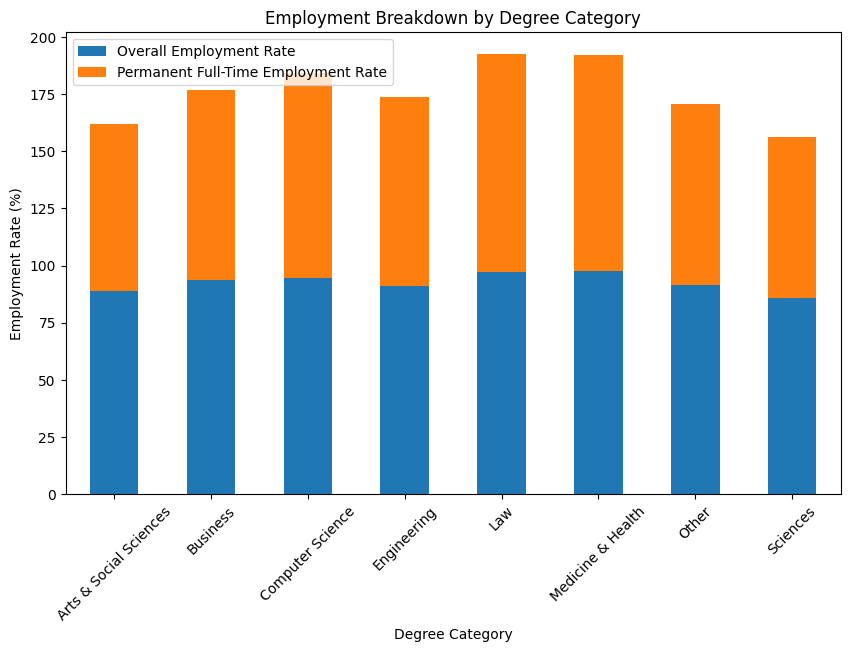


Stacked Bar Chart Interpretation:
* Compares average Overall Employment Rate and Permanent Full-Time Employment Rate by degree category.
* The stacked segments show how much of the total employment rate is permanent full-time vs. other forms of employment.
* Helps visualise which categories have a strong permanent full-time component relative to overall employment.



In [19]:
###############################################################################
# 4. Stacked Bar Chart – Employment breakdown by degree type
###############################################################################

df_grouped = df.groupby('degree_category')[['(OER) Overall Employment Rate', 
                                            '(PFTER) Permanent Full Time Employment Rate']].mean()
df_grouped.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel("Degree Category")
plt.ylabel("Employment Rate (%)")
plt.title("Employment Breakdown by Degree Category")
plt.legend(["Overall Employment Rate", "Permanent Full-Time Employment Rate"])
plt.xticks(rotation=45)

plt.savefig("./data_analysis/stacked_bar_chart/stacked_bar_chart.png", dpi=300, bbox_inches="tight")
plt.show()

# Interpretation (Stacked Bar Chart)
stacked_bar_chart_interpretation=("""
Stacked Bar Chart Interpretation:
* Compares average Overall Employment Rate and Permanent Full-Time Employment Rate by degree category.
* The stacked segments show how much of the total employment rate is permanent full-time vs. other forms of employment.
* Helps visualise which categories have a strong permanent full-time component relative to overall employment.
""")

with open("./data_analysis/stacked_bar_chart/stacked_bar_chart_interpretation.txt", "w") as file:
    file.write(stacked_bar_chart_interpretation)

print(stacked_bar_chart_interpretation)




ANOVA Analysis

ANOVA Assumptions Testing:
--------------------------------------------------
Levene's test p-value: 0.0000
Kruskal-Wallis H-test p-value: 2.6737e-11


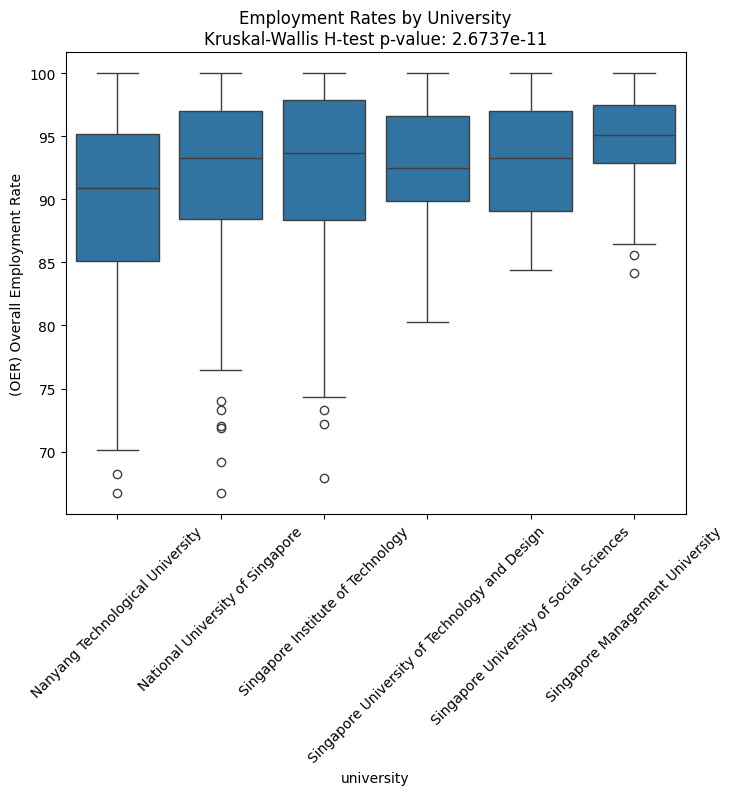

Kruskal-Wallis H-test p-value: 7.0259e-33


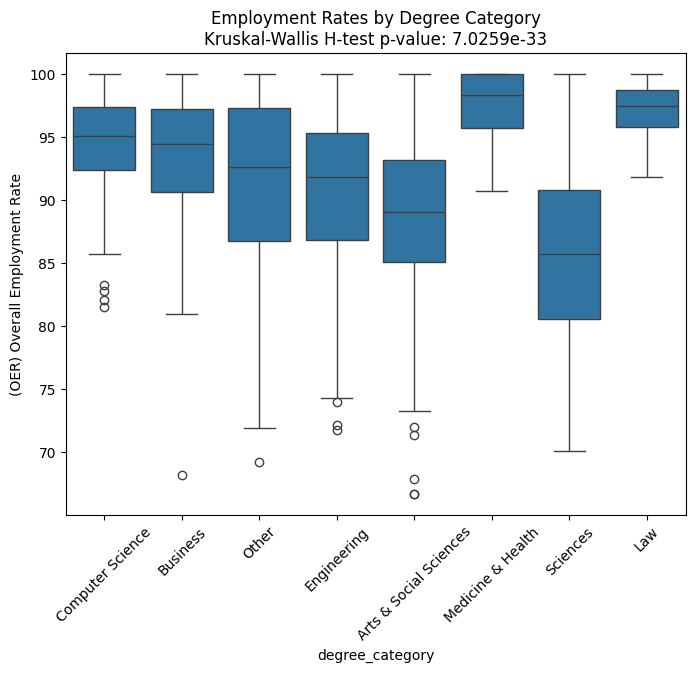

In [20]:
###############################################################################
# 5. ANOVA Analysis (Kruskal-Wallis due to assumption violations)
###############################################################################

# Prepare data for ANOVA
print("\nANOVA Analysis")
df_clean = df.dropna(subset=['(OER) Overall Employment Rate', 'university', 'degree_category'])

# By University
universities = df_clean['university'].unique()
employment_by_uni = [
    df_clean[df_clean['university'] == uni]['(OER) Overall Employment Rate'].dropna() 
    for uni in universities
]

# Test assumptions
print("\nANOVA Assumptions Testing:")
print("-" * 50)

# Normality Tests (Shapiro-Wilk)
normality_violated = any(shapiro(group)[1] < 0.05 for group in employment_by_uni)

# Homogeneity of variances (Levene's test)
levene_stat, levene_p = levene(*employment_by_uni)
print(f"Levene's test p-value: {levene_p:.4f}")

# ANOVA or Kruskal-Wallis
if normality_violated or levene_p < 0.05:
    test_used = "Kruskal-Wallis H-test"
    h_stat_uni, p_value_uni = stats.kruskal(*employment_by_uni, nan_policy='omit')
else:
    test_used = "One-way ANOVA"
    h_stat_uni, p_value_uni = stats.f_oneway(*employment_by_uni)

print(f"{test_used} p-value: {p_value_uni:.4e}")

# Visualization - Employment Rate by University
plt.figure(figsize=(8, 6))
sns.boxplot(x='university', y='(OER) Overall Employment Rate', data=df_clean)
plt.title(f'Employment Rates by University\n{test_used} p-value: {p_value_uni:.4e}')
plt.xticks(rotation=45)

plt.savefig("./data_analysis/anova_analysis/anova_plot_ERvsUNI.png", dpi=300, bbox_inches="tight")
plt.show()

# By Degree Category
degree_cats = df_clean['degree_category'].unique()
employment_by_degree = [
    df_clean[df_clean['degree_category'] == deg]['(OER) Overall Employment Rate'].dropna()
    for deg in degree_cats
]

# Test assumptions for degree categories
normality_violated_deg = any(shapiro(group)[1] < 0.05 for group in employment_by_degree)
levene_stat_deg, levene_p_deg = levene(*employment_by_degree)

if normality_violated_deg or levene_p_deg < 0.05:
    test_used_deg = "Kruskal-Wallis H-test"
    h_stat_deg, p_value_deg = stats.kruskal(*employment_by_degree)
else:
    test_used_deg = "One-way ANOVA"
    f_stat_deg, p_value_deg = stats.f_oneway(*employment_by_degree)

print(f"{test_used_deg} p-value: {p_value_deg:.4e}")

# Visualization - Employment Rate by Degree Category
plt.figure(figsize=(8, 6))
sns.boxplot(x='degree_category', y='(OER) Overall Employment Rate', data=df_clean)
plt.title(f'Employment Rates by Degree Category\n{test_used_deg} p-value: {p_value_deg:.4e}')
plt.xticks(rotation=45)

plt.savefig("./data_analysis/anova_analysis/anova_plot_ERvsDC.png", dpi=300, bbox_inches="tight")
plt.show()




Chi-Square Test Analysis
University Chi-square p-value: 0.0000
Degree Category Chi-square p-value: 0.0000


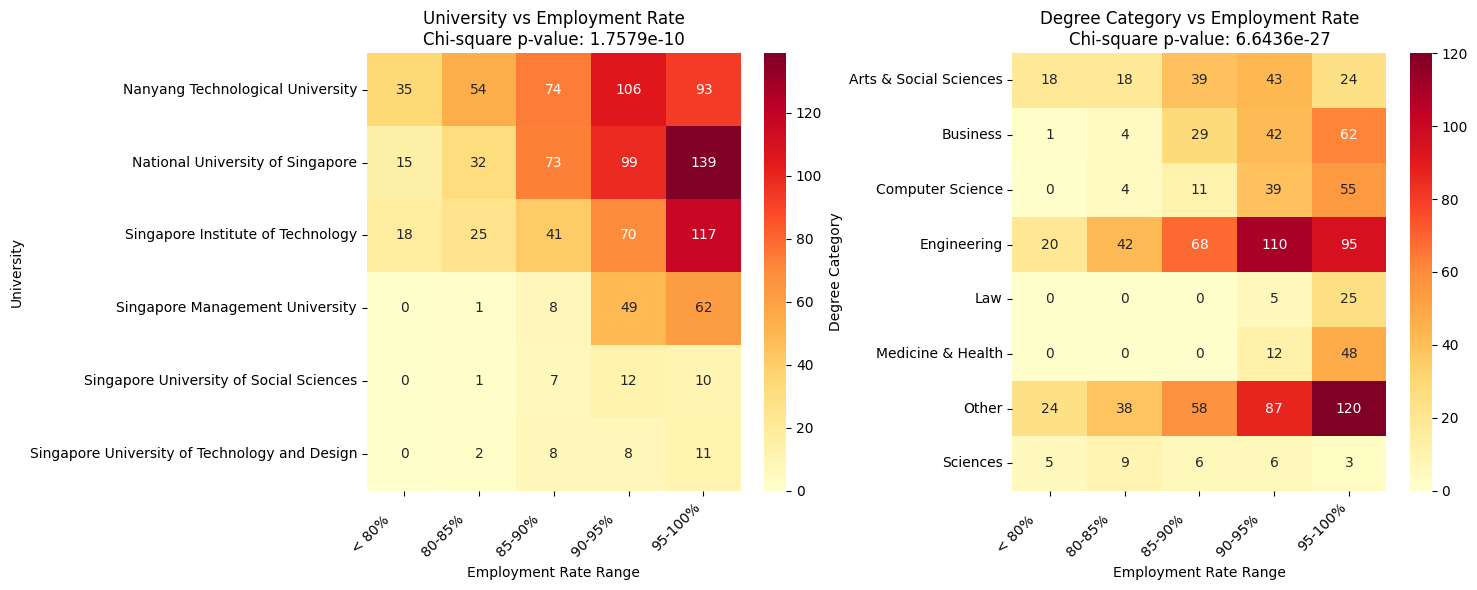


Chi-Square Test Analysis Interpretation:

1. University vs Employment Rate:
   - Null Hypothesis: There is no relationship between university choice and employment rate
   - P-value: 0.0000
   - Interpretation: Reject the null hypothesis (p < 0.05)
   - Key Finding: There is a significant relationship between university choice and employment rate

2. Degree Category vs Employment Rate:
   - Null Hypothesis: There is no relationship between degree category and employment rate
   - P-value: 0.0000
   - Interpretation: Reject the null hypothesis (p < 0.05)
   - Key Finding: There is a significant relationship between degree category and employment rate

3. Overall Conclusions:
   - Both university choice and degree category show similar patterns in relation to employment rates
   - The heatmaps visualize the frequency distribution of employment rates across different universities and degree categories
   - Darker colors in the heatmap indicate higher frequencies of observations in those 

In [43]:
###############################################################################
# 6. Chi-square Test (University & Degree Category vs Employment Status)
###############################################################################

print("\nChi-Square Test Analysis")

# Create employment rate bins with well-spaced labels
bins = [0, 80, 85, 90, 95, 100]
labels = ['< 80%    ', '80-85%    ', '85-90%    ', '90-95%    ', '95-100%']  # Added extra spaces
df['employment_rate_bin'] = pd.cut(df['(OER) Overall Employment Rate'], 
                                 bins=bins,
                                 labels=labels)

# University vs Employment Status
uni_emp_table = pd.crosstab(df['university'], df['employment_rate_bin'])
chi2_uni, p_value_uni, dof_uni, _ = chi2_contingency(uni_emp_table)
print(f"University Chi-square p-value: {p_value_uni:.4f}")

# Degree Category vs Employment Status
degree_emp_table = pd.crosstab(df['degree_category'], df['employment_rate_bin'])
chi2_deg, p_value_deg, dof_deg, _ = chi2_contingency(degree_emp_table)
print(f"Degree Category Chi-square p-value: {p_value_deg:.4f}")

# Visualization - Chi-Square Test Heatmaps
plt.figure(figsize=(15, 6))  # Made figure wider

# Left subplot: University vs Employment Rate
plt.subplot(1, 2, 1)
sns.heatmap(uni_emp_table, annot=True, fmt='d', cmap='YlOrRd')
plt.title(f'University vs Employment Rate\nChi-square p-value: {p_value_uni:.4e}')
plt.xlabel('Employment Rate Range')
plt.ylabel('University')
plt.xticks(rotation=45, ha='right')  # Rotated labels for better spacing

# Right subplot: Degree Category vs Employment Rate
plt.subplot(1, 2, 2)
sns.heatmap(degree_emp_table, annot=True, fmt='d', cmap='YlOrRd')
plt.title(f'Degree Category vs Employment Rate\nChi-square p-value: {p_value_deg:.4e}')
plt.xlabel('Employment Rate Range')
plt.ylabel('Degree Category')
plt.xticks(rotation=45, ha='right')  # Rotated labels for better spacing

plt.tight_layout()
plt.savefig("./data_analysis/chi-squared_test/chi-squared_test_plot.png", dpi=300, bbox_inches="tight")
plt.show()



# Chi-square test interpretation
chi_square_interpretation = """
Chi-Square Test Analysis Interpretation:

1. University vs Employment Rate:
   - Null Hypothesis: There is no relationship between university choice and employment rate
   - P-value: {:.4f}
   - Interpretation: {}
   - Key Finding: {}

2. Degree Category vs Employment Rate:
   - Null Hypothesis: There is no relationship between degree category and employment rate
   - P-value: {:.4f}
   - Interpretation: {}
   - Key Finding: {}

3. Overall Conclusions:
   - {}
   - The heatmaps visualize the frequency distribution of employment rates across different universities and degree categories
   - Darker colors in the heatmap indicate higher frequencies of observations in those categories
""".format(
    p_value_uni,
    "Fail to reject the null hypothesis (p > 0.05)" if p_value_uni > 0.05 else "Reject the null hypothesis (p < 0.05)",
    "No significant relationship between university choice and employment rate" if p_value_uni > 0.05 else "There is a significant relationship between university choice and employment rate",
    p_value_deg,
    "Fail to reject the null hypothesis (p > 0.05)" if p_value_deg > 0.05 else "Reject the null hypothesis (p < 0.05)",
    "No significant relationship between degree category and employment rate" if p_value_deg > 0.05 else "There is a significant relationship between degree category and employment rate",
    "Both university choice and degree category show similar patterns in relation to employment rates" if (p_value_uni > 0.05 and p_value_deg > 0.05) or (p_value_uni < 0.05 and p_value_deg < 0.05) else "University choice and degree category show different patterns in relation to employment rates"
)

# Save interpretation to file
with open("./data_analysis/chi-squared_test/chi-squared_test_interpretation.txt", "w") as file:
    file.write(chi_square_interpretation)

print(chi_square_interpretation)


Regression Analysis Results:
--------------------------------------------------------------------------------

1. Simple Linear Regression (Employment Rate vs Salary):
Slope: 38.52
Intercept: 246.89
R-squared: 0.1289
P-value: 6.5531e-37
Standard Error: 2.93

2. Multiple Regression Results:
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                         969.3734    289.685      3.346      0.001     401.011    1537.736
(OER) Overall Employment Rate                  20.4016      4.101      4.975      0.000      12.355      28.448
(PFTER) Permanent Full Time Employment Rate    11.4640      1.845      6.212      0.000       7.843      15.085

Regression Analysis Interpretation:
1. Simple Linear Regression:
    - The relationship between employment rate and salary is positive.
    - For e

/var/folders/7w/17mwsbnn07ncgpsfjgw8mfw80000gn/T/ipykernel_89668/1545863345.py:78: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  model.params[1],
/var/folders/7w/17mwsbnn07ncgpsfjgw8mfw80000gn/T/ipykernel_89668/1545863345.py:79: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  model.params[2],


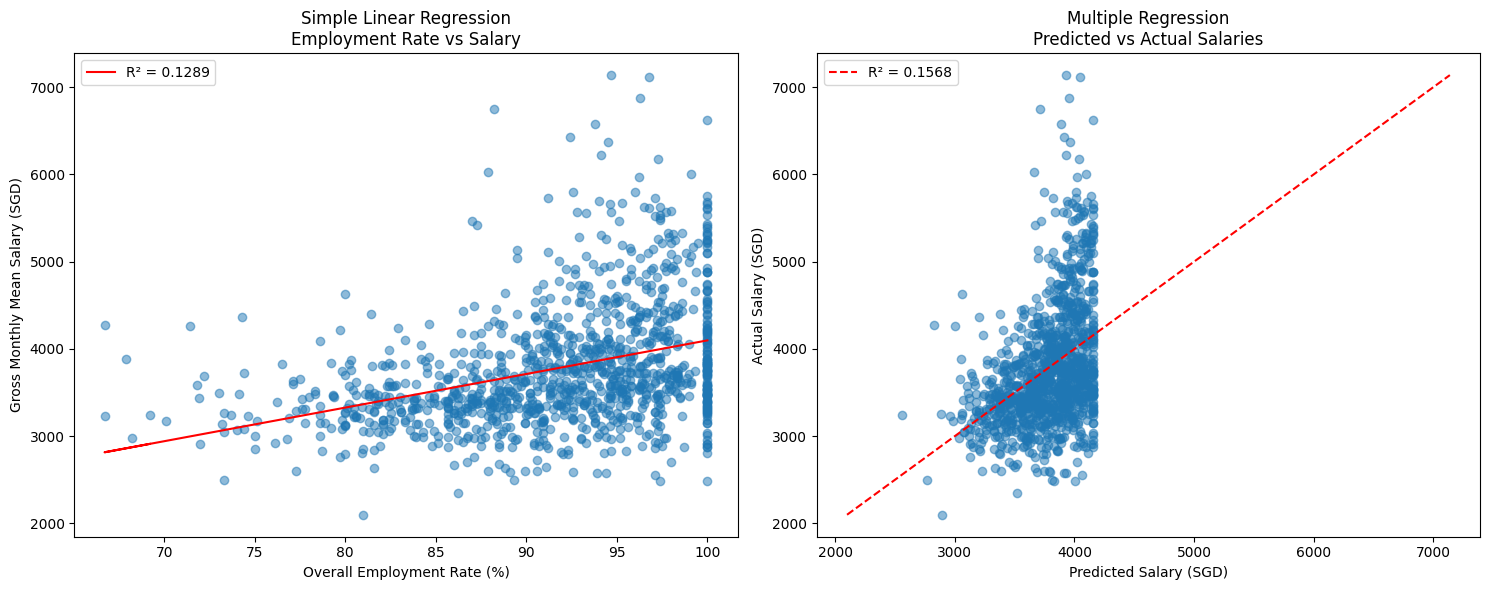

In [44]:
###############################################################################
# 7. Regression Analysis
###############################################################################

import sys
import io
from IPython.core.interactiveshell import InteractiveShell

class OutputCapturer(io.StringIO):
    def __init__(self):
        super().__init__()
        self._stdout = sys.stdout  # Save the original stdout

    def write(self, message):
        # Write to the file
        with open('./data_analysis/regression_analysis/regression_analysis_interpretation.txt', 'a') as f:
            f.write(message)
        
        # Also print to the notebook output (standard stdout)
        self._stdout.write(message)

# Set the custom output capturer
capturer = OutputCapturer()
sys.stdout = capturer

# Clean data for regression analysis
df_regression = df.dropna(subset=['(OER) Overall Employment Rate', 
                                    '(PFTER) Permanent Full Time Employment Rate',
                                    '(GMM) Gross Monthly Mean'])

# Simple Linear Regression
X = df_regression['(OER) Overall Employment Rate'].values.reshape(-1, 1)
y = df_regression['(GMM) Gross Monthly Mean'].values
slope, intercept, r_value, p_value, std_err = stats.linregress(X.flatten(), y)

# Multiple Regression
X_multi = pd.DataFrame(df_regression[['(OER) Overall Employment Rate', 
                                    '(PFTER) Permanent Full Time Employment Rate']])
X_multi = sm.add_constant(X_multi)
y_multi = df_regression['(GMM) Gross Monthly Mean']

# Run the regression model
model = sm.OLS(y_multi, X_multi).fit()

# Print regression results
print("\nRegression Analysis Results:")
print("-" * 80)

print("\n1. Simple Linear Regression (Employment Rate vs Salary):")
print(f"Slope: {slope:.2f}")
print(f"Intercept: {intercept:.2f}")
print(f"R-squared: {r_value**2:.4f}")
print(f"P-value: {p_value:.4e}")
print(f"Standard Error: {std_err:.2f}")

print("\n2. Multiple Regression Results:")
print(model.summary().tables[1])

# Regression interpretation
print("""
Regression Analysis Interpretation:
1. Simple Linear Regression:
    - The relationship between employment rate and salary is {}.
    - For each 1% increase in employment rate, salary changes by ${:.2f}.
    - The model explains {:.1f}% of the variance in salaries.
    - The relationship is statistically {}.

2. Multiple Regression:
    - Overall Employment Rate coefficient: {:.2f}
    - Permanent Full-Time Employment Rate coefficient: {:.2f}
    - The multiple regression model explains {:.1f}% of the variance.
    - The model's overall significance is {}.
""".format(
    "positive" if slope > 0 else "negative",
    slope,
    r_value**2 * 100,
    "significant (p < 0.05)" if p_value < 0.05 else "not significant",
    model.params[1],
    model.params[2],
    model.rsquared * 100,
    "significant (p < 0.05)" if model.f_pvalue < 0.05 else "not significant"
))

# Visualize regression results
plt.figure(figsize=(15, 6))

# Simple regression plot
plt.subplot(1, 2, 1)
plt.scatter(X, y, alpha=0.5)
plt.plot(X, intercept + slope*X, 'r', label=f'R² = {r_value**2:.4f}')
plt.xlabel('Overall Employment Rate (%)')
plt.ylabel('Gross Monthly Mean Salary (SGD)')
plt.title('Simple Linear Regression\nEmployment Rate vs Salary')
plt.legend()

# Predicted vs Actual plot
plt.subplot(1, 2, 2)
plt.scatter(model.fittedvalues, y_multi, alpha=0.5)
plt.plot([y_multi.min(), y_multi.max()], [y_multi.min(), y_multi.max()], 'r--', label=f'R² = {model.rsquared:.4f}')
plt.xlabel('Predicted Salary (SGD)')
plt.ylabel('Actual Salary (SGD)')
plt.title('Multiple Regression\nPredicted vs Actual Salaries')
plt.legend()

plt.tight_layout()

plt.savefig("./data_analysis/regression_analysis/regression_analysis.png", dpi=300, bbox_inches="tight")
plt.show()

# Reset the output back to the usual stdout
sys.stdout = capturer._stdout